<a href="https://colab.research.google.com/github/FennicOculus/Ml_From_Scratch/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing Libraries

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random as rand

## Importing Data

# Defining Functions

In [151]:
def addingIntercept(X):
  intercept=np.ones((data.shape[0],1))
  X=np.column_stack((intercept,X[:,0:X.shape[1]-1]))
  return X

In [152]:
def targetDef(X):
  X = X[:, X.shape[1]-1]
  return X.reshape(len(X), 1)

In [153]:
def Sigmoid(z):
    return 1/(1 + np.exp(-z))

In [154]:
def hestimation(X, theta):
  return Sigmoid(X.dot(theta))

In [155]:
def computeCost(X, y, theta):
    return -np.mean(y * np.log(hestimation(X, theta)) + (1 - y) * np.log(1 - hestimation(X, theta)))

In [157]:
def predict(X, theta, seuil=0.5):
  preds = hestimation(np.asarray(X), theta)
  pred_class = [1 if i >= seuil else 0 for i in preds]
  return np.array(pred_class)

In [158]:
def predictProba(X, theta):
  preds = hestimation(np.asarray(X), theta)
  return np.array(preds)

In [159]:
def drawLine(X, theta):

  xmin, xmax = X.min(), X.max()
  y = (-theta[1]/theta[2]) * np.array([xmin, xmax]) + (-theta[0]/theta[2])

  plt.plot(np.array([xmin, xmax]), y, 'k')

In [177]:
def Split(data):
  X=data[:,0:2]
  y = data[:, 2]
  y = y.reshape(len(y), 1)
  return X, y

# Model

In [156]:
def gradientDescent(X, y, alpha=0.1, iterations=50000):
    
    X = addingIntercept(data)

    theta = np.zeros((X.shape[1], 1))
    
    J_history = []

    H = np.zeros((X.shape[0], 1))
    m = len(y)

    # Sauvegarde de la première valeur 
    J_history.append(computeCost(X, y, theta))

    for iter in tqdm(range(iterations)):

      new_theta = alpha * 1/m * np.sum(np.dot(X.T, np.subtract(hestimation(X, theta), y)),axis=1).reshape(-1,1)
      theta = np.subtract(theta, new_theta)

      # Sauvegarde des résulat de l'itération
      J_history.append(computeCost(X, y, theta))
      
    return theta, np.array(J_history)

# Testing Model

In [182]:
# Data
data = np.genfromtxt('/content/drive/MyDrive/AI/TP3/data.csv', delimiter=',', dtype=float)
data.shape

(100, 3)

In [184]:
data[:10]

array([[ 6.9247, 15.605 ,  0.    ],
       [ 6.0573,  8.779 ,  0.    ],
       [ 7.1695, 14.58  ,  0.    ],
       [12.037 , 17.262 ,  1.    ],
       [15.807 , 15.069 ,  1.    ],
       [ 9.0167, 11.263 ,  0.    ],
       [12.221 , 19.302 ,  1.    ],
       [15.005 ,  9.3108,  1.    ],
       [15.22  , 17.484 ,  1.    ],
       [16.887 ,  8.7067,  1.    ]])

In [178]:
X, y = Split(data)

In [179]:
# paramètres
iterations = 30000;
alpha = 0.09;
# Appel
theta, J_history  = gradientDescent(X, y, alpha, iterations);

100%|██████████| 30000/30000 [00:02<00:00, 13211.17it/s]


In [180]:
X = addingIntercept(data)
y = targetDef(data)

# Drawing Descision Boundary


Text(0, 0.5, 'Mark in module 2')

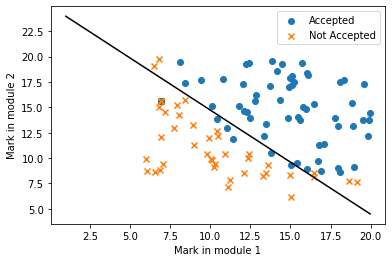

In [181]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="Accepted",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="Not Accepted",marker ='x')
drawLine(X, theta)
plt.legend()
plt.xlabel('Mark in module 1')
plt.ylabel('Mark in module 2')

# Comparing to scikit-learn implementation

In [164]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [165]:
logisticRegr.fit(data[:, 0:2], data[:, 2])

LogisticRegression()

In [186]:
from seaborn import heatmap
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

In [166]:
accuracy_score(y, predict(X, theta)), accuracy_score(y, logisticRegr.predict(X[:, 1:3]))

(0.89, 0.89)

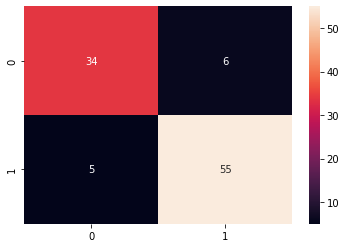

In [169]:
heatmap(confusion_matrix(y, predict(X, theta)), annot=True)

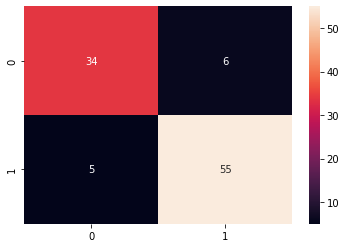

In [170]:
heatmap(confusion_matrix(y, logisticRegr.predict(X[:, 1:3])), annot=True)

In [171]:
fpr1, tpr1, _ = roc_curve(y,  logisticRegr.predict_proba(X[:, 1:3])[::,1])
fpr2, tpr2, _ = roc_curve(y,  predictProba(X, theta))

Text(0.5, 0, 'False Positive Rate')

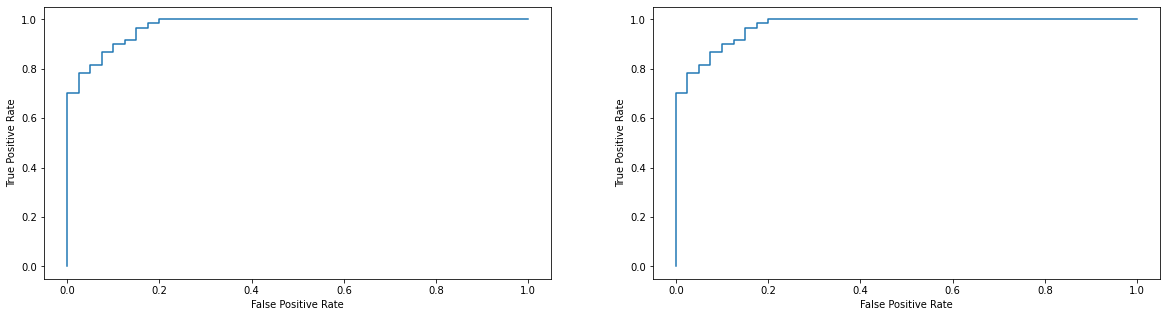

In [174]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.subplot(1, 2, 1)
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(1, 2, 2)
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

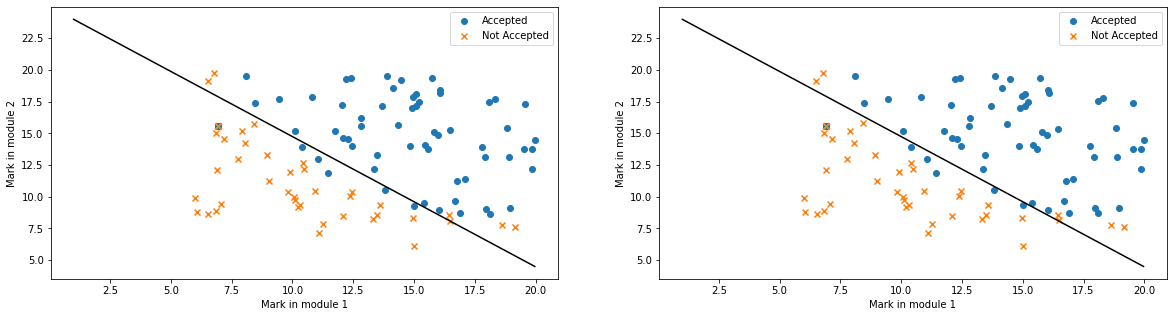

In [175]:
parameters = np.array([logisticRegr.intercept_[0], logisticRegr.coef_[0][0], logisticRegr.coef_[0][1]])
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.subplot(1, 2, 1)
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="Accepted",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="Not Accepted",marker ='x')
drawLine(X, parameters)
plt.xlabel('Mark in module 1')
plt.ylabel('Mark in module 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="Accepted",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="Not Accepted",marker ='x')
drawLine(X, theta)
plt.xlabel('Mark in module 1')
plt.ylabel('Mark in module 2')
plt.legend()